#ライブラリのインポート

In [ ]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 10.2 MB/s eta 0:

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import gradio as gr

print(tf.__version__)

2.11.0


In [ ]:
tf.get_logger().setLevel('ERROR')

#TensorflowでAIモデルを作成

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

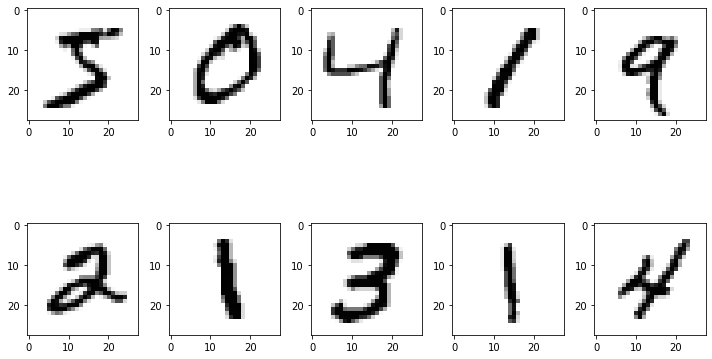

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 10), tight_layout=True)

n = 0
for i in range(2):
  for j in range(5):
    ax[i][j].imshow(x_train[n], cmap=plt.cm.binary)
    n += 1

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2609 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1158 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0800 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0590 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0298 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.015

In [ ]:
_, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0949 - accuracy: 0.9755 - 914ms/epoch - 3ms/step
0.9754999876022339


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


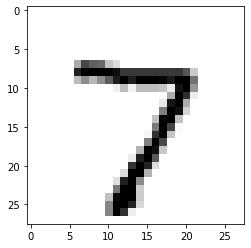

In [ ]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
pass

In [ ]:
import numpy as np

np.argmax(predictions[0])

7

# Gradioで画像認識アプリにする

In [ ]:
def recognize_digit(img):
  img = img.reshape(1,28,28)
  prediction = model.predict(img).tolist()[0]
  return {str(i): prediction[i] for i in range(10)}

label = gr.outputs.Label(num_top_classes=4)
interface = gr.Interface(fn=recognize_digit, inputs='sketchpad', outputs=label, live=True, title='Digit Recognizer')

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2b9029a5e134eeead5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
